In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [34]:
df = pd.read_csv('computed_results.csv')

In [54]:
df['number_iterations'] = df['computed-eigenvalues'].apply(lambda x: len(eval(x)))
median_iterations = int(np.median(df['number_iterations']))
row = df[df['number_iterations'] == median_iterations].iloc[0]
row

dominant-eigenvalue                                            106.454243
computed-eigenvalues    [(1, 93.52055955237421), (2, 108.0472398162277...
number_iterations                                                       7
Name: 12, dtype: object

Text(0, 0.5, 'Eigenvalue')

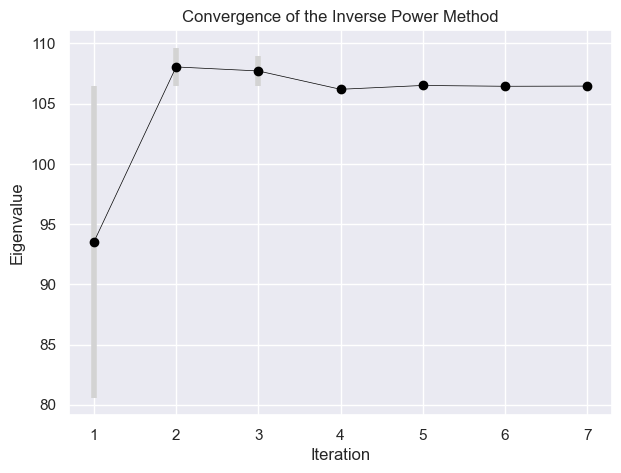

In [88]:
values = [v[1] for v in eval(row['computed-eigenvalues'])]
iter = [v[0] for v in eval(row['computed-eigenvalues'])]
errors = [abs(row['dominant-eigenvalue'] - v) for v in values]

sns.set_theme(style='darkgrid')
plt.figure(figsize=(7, 5))
plt.errorbar(iter, values, errors, fmt='o', color='black', ecolor='lightgray', elinewidth=4, capsize=0)
plt.plot(iter, values, linestyle='-', color='black', linewidth=0.5)
plt.title('Convergence of the Inverse Power Method')
plt.xlabel('Iteration')
plt.ylabel('Eigenvalue')
